### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
csize_broad = np.zeros([31,149,182])
for i in range(0,31):
        csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]

#ukesm.somxl010.sel(y=slice(0,140)).weighted(ukmesh['area'].sel(y=slice(0,140))).mean(dim = ['x','y'])



## 
notes becci 
I had in my notes we needed to turn on:

    ptrc:

    B14B, 
    C14B,
    D14B 


[FBD]DECAY, QTR[CBD]14B output to diad

    fdecay
    bdecay
    ddecay
    qtrC14b
    qtrB14b
    qtrD14b
    qintC14b


In [17]:
ecodir = 'TOM12_PT_KR02'
co2dir = 'TOM12_PT_KR03'
gcbdir = 'TOM12_PT_RV07'

def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/data/greenocean/software/runs/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ecolist = make_yearlist(2015,2022,'ptrc',ecodir)
co2list = make_yearlist(2015,2022,'ptrc',co2dir)
gcblist = make_yearlist(2015,2022,'ptrc',gcbdir)

ecolistd = make_yearlist(2015,2022,'diad',ecodir)
co2listd = make_yearlist(2015,2022,'diad',co2dir)
gcblistd = make_yearlist(2015,2022,'diad',gcbdir)

In [18]:
ecof = xr.open_mfdataset(ecolist)
co2f = xr.open_mfdataset(co2list)
gcbf = xr.open_mfdataset(gcblist)

ecod = xr.open_mfdataset(ecolistd)
co2d = xr.open_mfdataset(co2listd)
gcbd = xr.open_mfdataset(gcblistd)

In [26]:
co2d

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, time_counter: 96, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 2015-01-16 12:00:00 ... 2022-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables: (12/49)
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    DOCTRP                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    EXP                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMIC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ...                    ...
    Cflx                  (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    PICflx                (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    Oflx                  (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    dpCO2                 (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    pCO2                  (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    PPINT                 (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
Attributes:
    name:         ORCA2_1m_20150101_20151231
    description:  additional planktom diagnostics
    title:        additional planktom diagnostics
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2023-Nov-09 05:33:55 GMT

In [19]:
co2d

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, time_counter: 96, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 2015-01-16 12:00:00 ... 2022-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables: (12/49)
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    DOCTRP                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    EXP                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMIC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ...                    ...
    Cflx                  (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    PICflx                (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    Oflx                  (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    dpCO2                 (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    pCO2                  (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
    PPINT                 (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 182), meta=np.ndarray>
Attributes:
    name:         ORCA2_1m_20150101_20151231
    description:  additional planktom diagnostics
    title:        additional planktom diagnostics
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2023-Nov-09 05:33:55 GMT

In [20]:
ecof_B14 = ecof.B14B.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
co2f_B14 = co2f.B14B.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
#gcbf_B14 = gcbf.B14B.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

ecof_C14 = ecof.C14B.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
co2f_C14 = co2f.C14B.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
#gcbf_C14 = gcbf.C14B.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

ecof_D14 = ecof.D14B.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
co2f_D14 = co2f.D14B.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
#gcbf_D14 = gcbf.D14B.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

In [30]:
#     fdecay
#     bdecay
#     ddecay
#     qtrC14b
#     qtrB14b
#     qtrD14b
#     qintC14b

ecod_fdecay = ecod.fdecay.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
ecod_bdecay = ecod.bdecay.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
ecod_ddecay = ecod.ddecay.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

ecod_qtrC14b = ecod.qtrC14b.weighted(tmesh['csize']).mean(dim = ['x','y'])
ecod_qtrB14b = ecod.qtrB14b.weighted(tmesh['csize']).mean(dim = ['x','y'])
ecod_qtrD14b = ecod.qtrD14b.weighted(tmesh['csize']).mean(dim = ['x','y'])
ecod_qintC14b = ecod.qintC14b.weighted(tmesh['csize']).mean(dim = ['x','y'])

co2d_fdecay = co2d.fdecay.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
co2d_bdecay = co2d.bdecay.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])
co2d_ddecay = co2d.ddecay.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])

co2d_qtrC14b = co2d.qtrC14b.weighted(tmesh['csize']).mean(dim = ['x','y'])
co2d_qtrB14b = co2d.qtrB14b.weighted(tmesh['csize']).mean(dim = ['x','y'])
co2d_qtrD14b = co2d.qtrD14b.weighted(tmesh['csize']).mean(dim = ['x','y'])
co2d_qintC14b = co2d.qintC14b.weighted(tmesh['csize']).mean(dim = ['x','y'])

In [31]:
times = co2f_D14.indexes['time_counter'].to_datetimeindex()

In [32]:
#ecof_B14 = ecof.fdecay.isel(deptht=0).weighted(tmesh['csize']).mean(dim = ['x','y'])


In [47]:
# axs[2].plot(times,ecod_qtrC14b, color = 'r', label = 'ECO qtrC14b')
# axs[2].plot(times,ecod_qtrB14b, color = 'r', linestyle = ':', label = 'ECO qtrB14b')
# axs[2].plot(times,ecod_qtrD14b, color = 'r', linestyle = '--', label = 'ECO qtrD14b')
# axs[2].plot(times,ecod_qintC14b, color = 'r', linestyle = '-.', label = 'ECO qintC14b')
ecod_qtrB14b.values

array([ 1.71536058e-07,  1.72592869e-07,  1.71299974e-07,  1.67936628e-07,
        1.68839002e-07,  1.70422525e-07,  1.67131293e-07,  1.71108674e-07,
        1.64251544e-07,  1.68557573e-07,  1.73029822e-07,  1.71829336e-07,
        1.73520388e-07,  1.82960792e-07,  1.77894454e-07,  1.70471857e-07,
        1.63209544e-07,  1.72889403e-07,  1.73051272e-07,  1.65502538e-07,
        1.75243702e-07,  1.65417233e-07,  1.64044796e-07,  1.59766430e-07,
        1.59147373e-07,  1.67122637e-07,  1.70166360e-07,  1.71985402e-07,
        1.76318915e-07,  1.69274872e-07,  1.69725258e-07,  1.68837244e-07,
        1.68179229e-07,  1.68500897e-07,  1.67002244e-07,  1.67156883e-07,
        1.71481540e-07,  1.67615652e-07,  1.73210009e-07,  1.64850859e-07,
        1.60484573e-07,  1.61157567e-07,  1.71196299e-07,  1.66803552e-07,
        1.68434733e-07,  1.63175351e-07,  1.71049202e-07,  1.67174081e-07,
        1.62752626e-07,  1.63660184e-07,  1.71508257e-07,  1.70235713e-07,
        1.61084717e-07,  

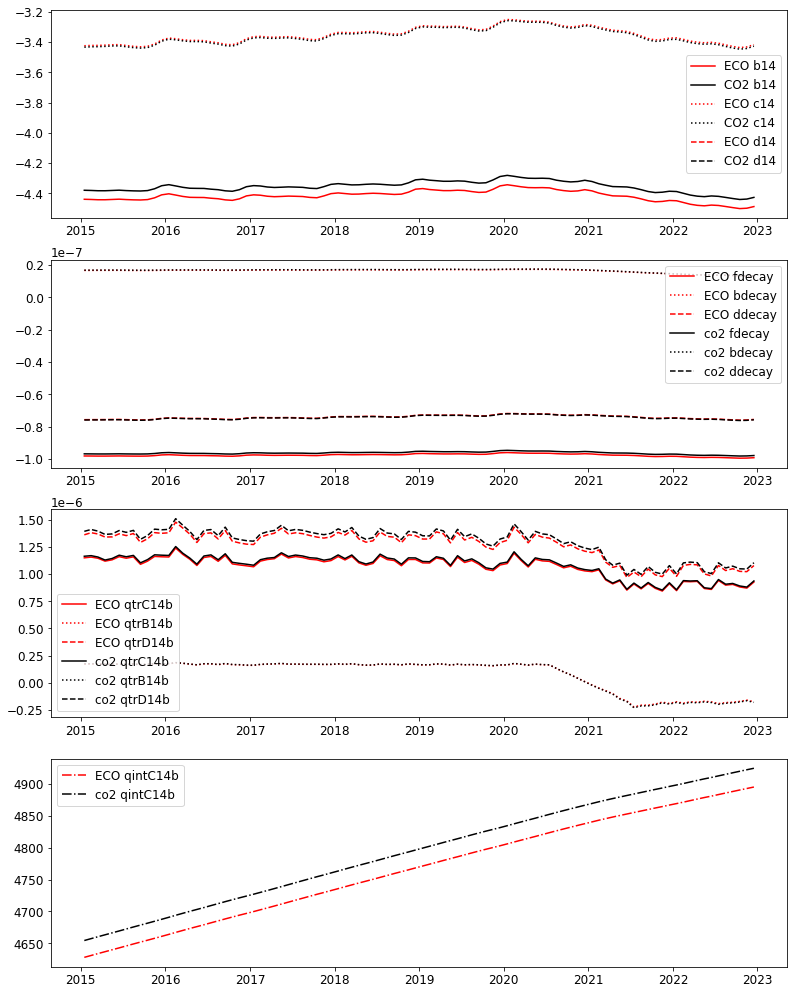

In [49]:
fact = 1.1
fig, axs = plt.subplots(4,1, figsize=(12*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(times,ecof_B14, color = 'r', label = 'ECO b14')
axs[0].plot(times,co2f_B14, color = 'k', label = 'CO2 b14')

axs[0].plot(times,ecof_C14, color = 'r', linestyle = ':', label = 'ECO c14')
axs[0].plot(times,co2f_C14, color = 'k', linestyle = ':', label = 'CO2 c14')

axs[0].plot(times,ecof_D14, color = 'r', linestyle = '--', label = 'ECO d14')
axs[0].plot(times,co2f_D14, color = 'k', linestyle = '--', label = 'CO2 d14')
#axs[0].plot(times,gcbf_B14, color = 'g', label = 'gcb b14')
axs[0].legend()
## decays
axs[1].plot(times,ecod_fdecay, color = 'r', label = 'ECO fdecay')
axs[1].plot(times,ecod_bdecay, color = 'r', linestyle = ':', label = 'ECO bdecay')
axs[1].plot(times,ecod_ddecay, color = 'r', linestyle = '--', label = 'ECO ddecay')

axs[1].plot(times,co2d_fdecay, color = 'k', label = 'co2 fdecay')
axs[1].plot(times,co2d_bdecay, color = 'k', linestyle = ':', label = 'co2 bdecay')
axs[1].plot(times,co2d_ddecay, color = 'k', linestyle = '--', label = 'co2 ddecay')
axs[1].legend()
#qtr
axs[2].plot(times,ecod_qtrC14b, color = 'r', label = 'ECO qtrC14b')
axs[2].plot(times,ecod_qtrB14b, color = 'r', linestyle = ':', label = 'ECO qtrB14b')
axs[2].plot(times,ecod_qtrD14b, color = 'r', linestyle = '--', label = 'ECO qtrD14b')


axs[2].plot(times,co2d_qtrC14b, color = 'k', label = 'co2 qtrC14b')
axs[2].plot(times,co2d_qtrB14b, color = 'k', linestyle = ':', label = 'co2 qtrB14b')
axs[2].plot(times,co2d_qtrD14b, color = 'k', linestyle = '--', label = 'co2 qtrD14b')

axs[3].plot(times,ecod_qintC14b, color = 'r', linestyle = '-.', label = 'ECO qintC14b')
axs[3].plot(times,co2d_qintC14b, color = 'k', linestyle = '-.', label = 'co2 qintC14b')
axs[3].legend()
axs[2].legend()
# ecod_qtrC14b = ecod.qtrC14b.weighted(tmesh['csize']).mean(dim = ['x','y'])
# ecod_qtrB14b = ecod.qtrB14b.weighted(tmesh['csize']).mean(dim = ['x','y'])
# ecod_qtrD14b = ecod.qtrD14b.weighted(tmesh['csize']).mean(dim = ['x','y'])
# ecod_qintC14b = ecod.qintC14b.weighted(tmesh['csize']).mean(dim = ['x','y'])